In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset into a dataframe
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In this dataset, we have 1338 rows and 7 columns. Out of the 7 columns, 6 are features and 1 is the label. "Charges" column is the label or the dependent variable. It contains continuous data. So, this is a regression problem.

# Exploratory Data Analysis (EDA

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.shape

(1338, 7)

In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


As we can see, there are 2 float data type, 2 int data type and 3 object data type columns.

The dataset contains 3 categorical data columns sex, smoker and region.

It also contains 4 continuous data columns age, bmi, children and charges.

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

We can observe that there are no null values in the dataset. This can also be visualized from the below heatmap.

<Axes: >

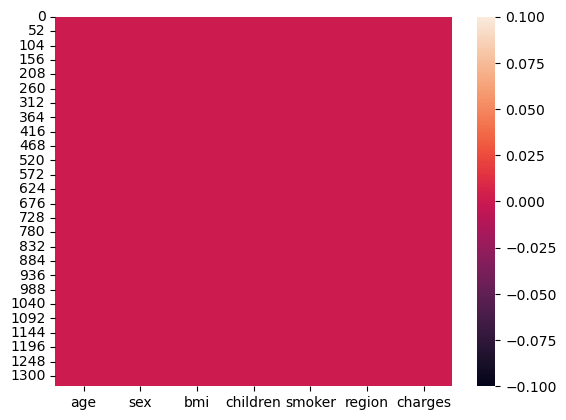

In [9]:
sns.heatmap(df.isnull())

Now, we can clearly visualize that there is no missing data present.

In [10]:
#Check the number of unique values in each column
df.nunique().to_frame("No. of unique values")

,No. of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [11]:
#Check the counts of unique values of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455 

We can observe from the above data that 'sex'column has 2 unique values 'male' and 'female', 'smoker' column has 2 unique values 'yes' and 'no' and region column has 4 unique values namely 'southeast', 'southwest', 'northeast' and 'northwest'.

In [12]:
#Statistical summary of numerical columns
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


We can observe that there are no null values in any of the columns.

The mean and median are almost equal for all the features. So, there is no skewness in the features. But in the label charges the mean is bigger than the median. So, the label is right skewed.

The max is much bigger than 75% for bmi and charges column. So, there are outliers in these columns. But we don't remove outliers from the label charges. So, we will remove outliers from bmi later.

# Data Visualization

Univariate Analysis

Let's visualize the distribution of each feature

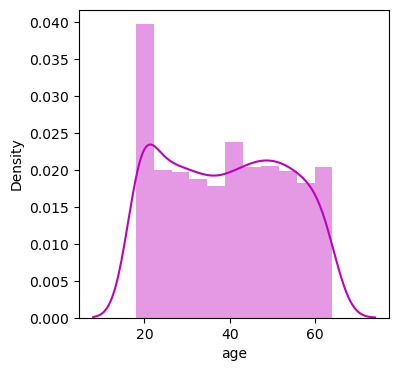

In [13]:
#Visualize the distribution of age data
plt.figure(figsize=(4,4))
sns.distplot(df['age'],color='m')
plt.show()

We can observe that the age data is normally distributed and there is no skewness.

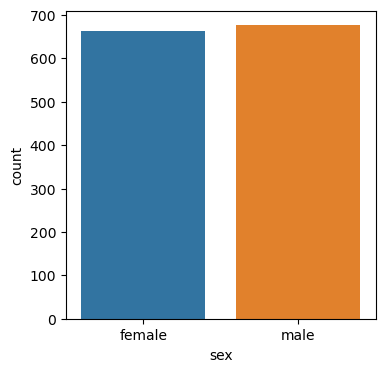

In [14]:
#Visualize the count of sex data
plt.figure(figsize=(4,4))
sns.countplot(x='sex',data=df)
plt.show()

We can observer that the number of values for male and female is almost equal.

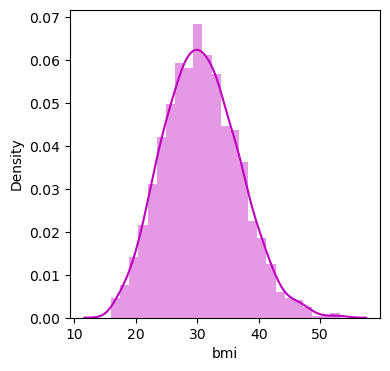

In [15]:
#Visualize the distribution of bmi data
plt.figure(figsize=(4,4))
sns.distplot(df['bmi'],color='m')
plt.show()

We can observe that the bmi data is normally distributed and there is no skewness.

BMI stands for Body Mass Index. The ideal range for BMI is 18.5 to 24.9. A person is said to be underweight below 18.5, normal between 18.5 to 24.9 and overweight above 24.9.

In this distribution we can see that most number of people fall between roughly 25 to 35 which indicates that most number of people are overweight and this can increase the insurance cost.

Although children is a numerical feature, since it has only 6 unique values from 0 to 5, we will draw a count plot for this data.

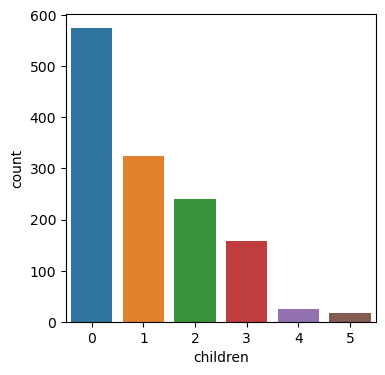

In [16]:
#Visualize the distribution of children data
plt.figure(figsize=(4,4))
sns.countplot(x='children',data=df)
plt.show()

We can observe that the highest number of people have no children.

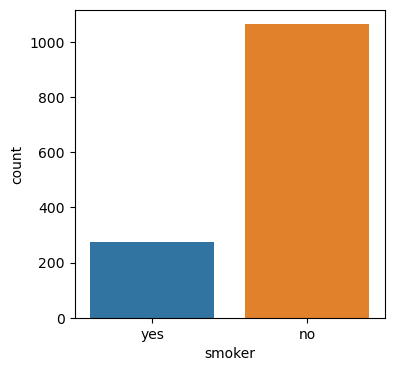

In [17]:
#Visualize the count of smoker data
plt.figure(figsize=(4,4))
sns.countplot(x='smoker',data=df)
plt.show()

We can see that the number of non-smokers are much higher than the number of smokers.

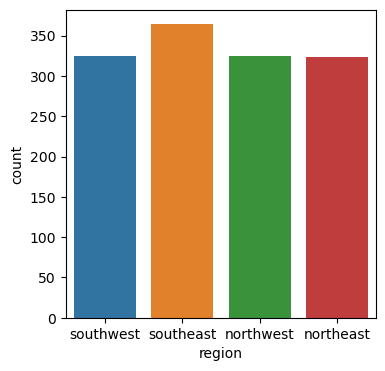

In [18]:
#Visualize the count of region data
plt.figure(figsize=(4,4))
sns.countplot(x='region',data=df)
plt.show()

We can observe that the number of values for all the 4 regions is almost similar.

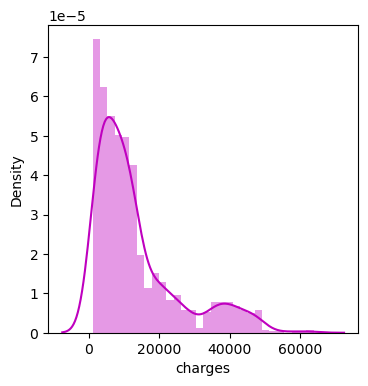

In [19]:
#Visualize the distribution of charges data
plt.figure(figsize=(4,4))
sns.distplot(df['charges'],color='m')
plt.show()

We can oberve that the number of people with charges or insurance cost between 0 to 20000 USD is very high and others are very low.

Bivariate Analysis

Let's analyse the relationship between the target variable and features

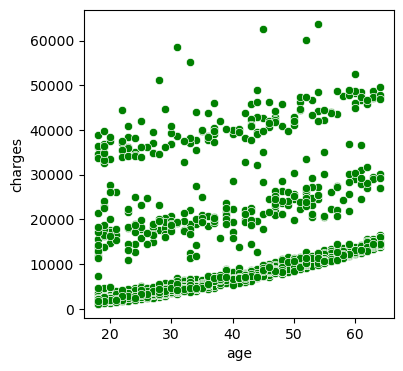

In [20]:
#Analyse the relation between age and charges
plt.figure(figsize=(4,4))
sns.scatterplot(x='age',y='charges',data=df,color='green')
plt.show()

We can observe that age and charges have a low positive linear relationship with each other.

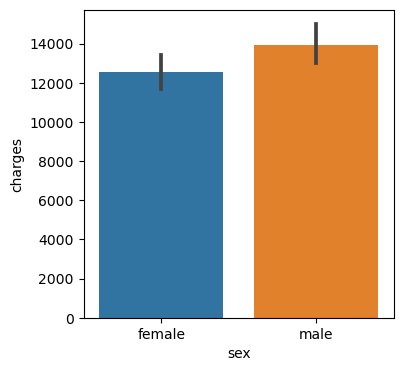

In [21]:
#Compare sex vs charges
plt.figure(figsize=(4,4))
sns.barplot(x='sex',y='charges',data=df)
plt.show()

We can observe that the charges for male is slightly higher than female.

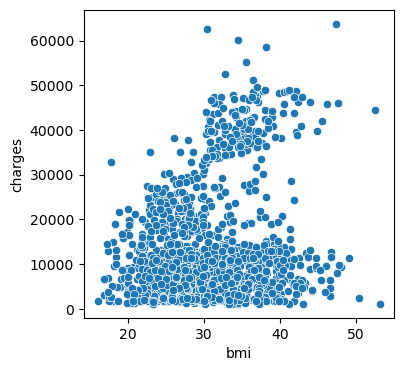

In [22]:
#Compare bmi vs charges
plt.figure(figsize=(4,4))
sns.scatterplot(x='bmi',y='charges',data=df)
plt.show()

We can observe that bmi and charges have a low positive linear relationship with each other.

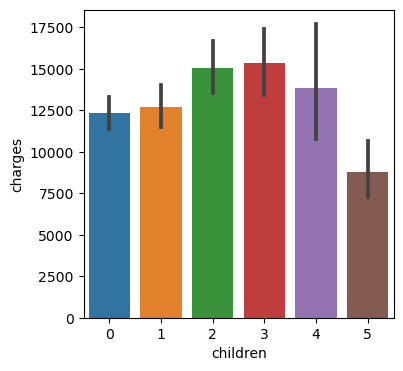

In [23]:
#Analyse children vs charges
plt.figure(figsize=(4,4))
sns.barplot(x='children',y='charges',data=df)
plt.show()

We can observe that there is not much correlation between children and charges.

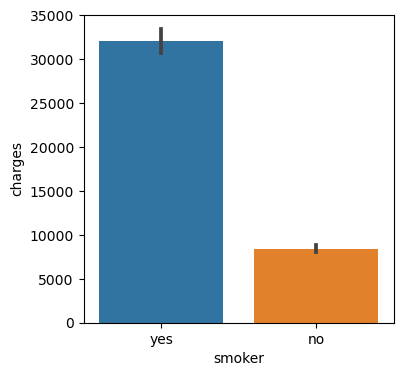

In [24]:
#Analyse smoker vs charges
plt.figure(figsize=(4,4))
sns.barplot(x='smoker',y='charges',data=df)
plt.show()

We can observe that the charges for smokers are much higher than non-smokers.

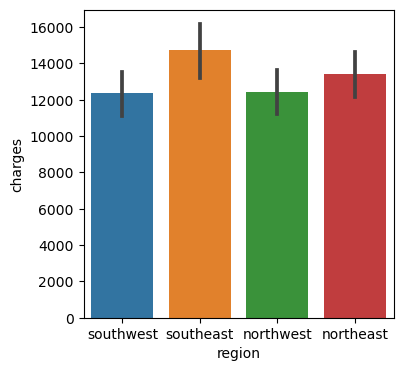

In [25]:
#Analyse region vs charges
plt.figure(figsize=(4,4))
sns.barplot(x='region',y='charges',data=df)
plt.show()

We can observe that the charges for southeast region is slightly higher than other regions.

Let's analyse the correlation between features.

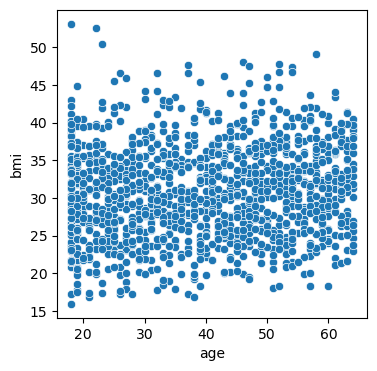

In [26]:
#Analyse age vs bmi
plt.figure(figsize=(4,4))
sns.scatterplot(x='age',y='bmi',data=df)
plt.show()

We can observe that there is no correlation between age and bmi.

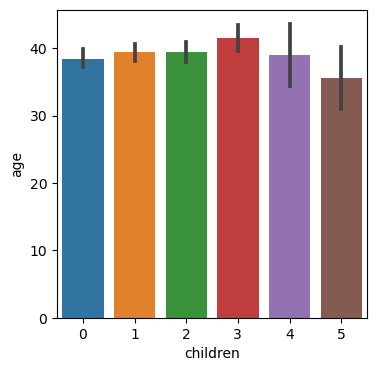

In [27]:
#Analyse children vs age
plt.figure(figsize=(4,4))
sns.barplot(x='children',y='age',data=df)
plt.show()

We can observe that older people have more number of children.

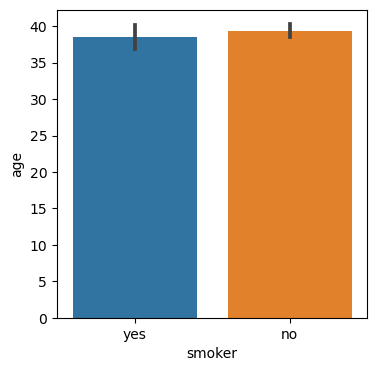

In [28]:
#Analyse smoker vs age
plt.figure(figsize=(4,4))
sns.barplot(x='smoker',y='age',data=df)
plt.show()

We can observe that there are smokers and non-smokers from all age groups.

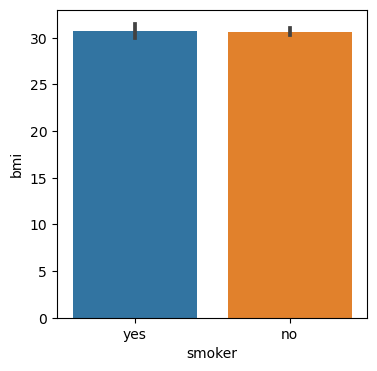

In [29]:
#Analyse smoker vs bmi
plt.figure(figsize=(4,4))
sns.barplot(x='smoker',y='bmi',data=df)
plt.show()

We can observe that there is no corrleation between smoker and bmi.

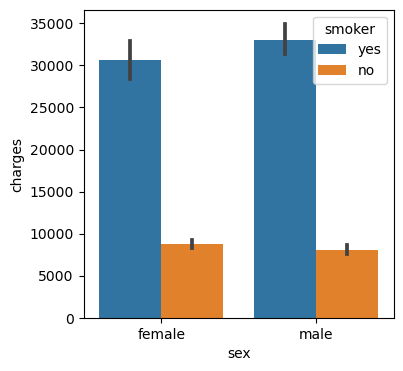

In [30]:
#Compare the insurance charges for smokers and non-smokers taking into account gender
plt.figure(figsize=(4,4))
sns.barplot(x='sex',y='charges',hue='smoker',data=df)
plt.show()

We can observe that the insurance cost for male smokers is higher than female smokers.

Multivariate Analysis

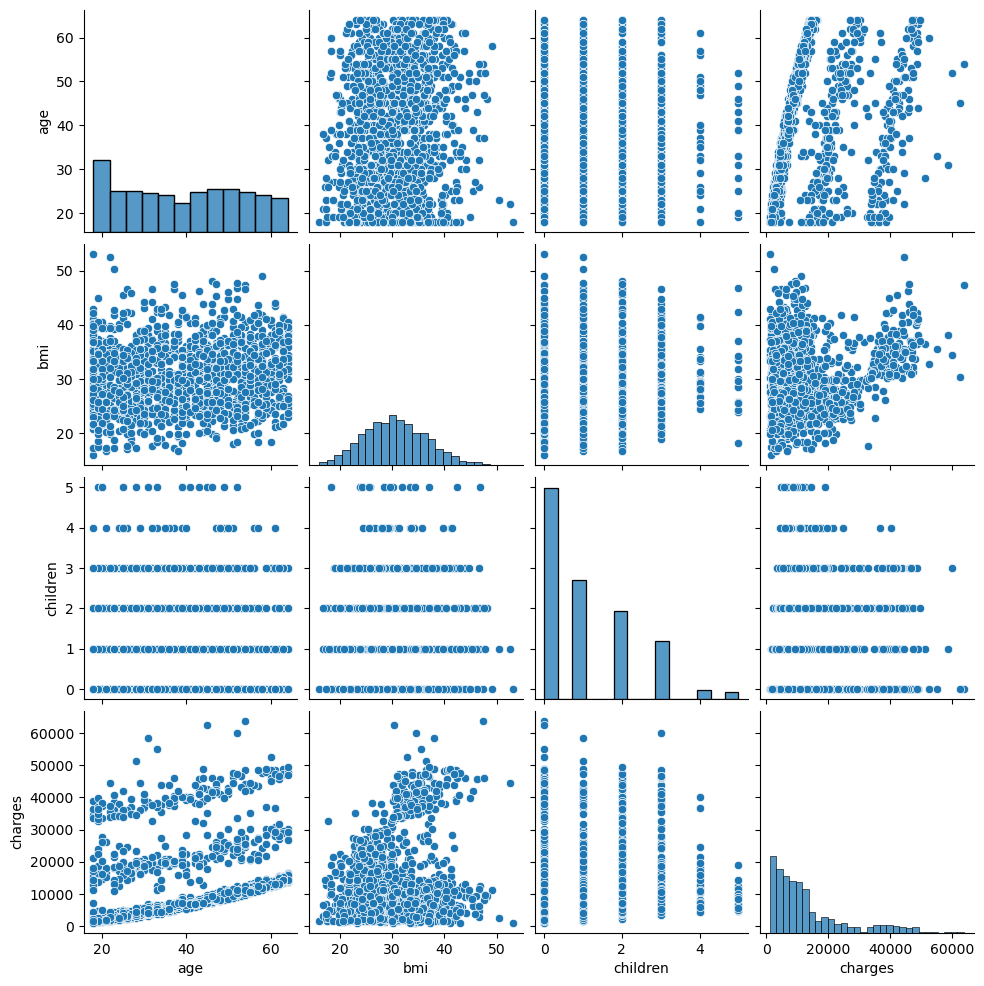

In [31]:
#Analyse the relationship between feature to feature and feature to label
sns.pairplot(data=df,palette="Dark2")
plt.show()

We can observe that age and bmi have positive linear relationship with the label charges.

There are no other significant correlations.

In [32]:
#Separate numerical and categorical columns
categorical_col=[]
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
    else:
        numerical_col.append(i)
print("Categorical columns: ",categorical_col)
print("\n")
print("Numerical columns: ",numerical_col)

Categorical columns:  ['sex', 'smoker', 'region']


Numerical columns:  ['age', 'bmi', 'children', 'charges']


Checking for Outliers

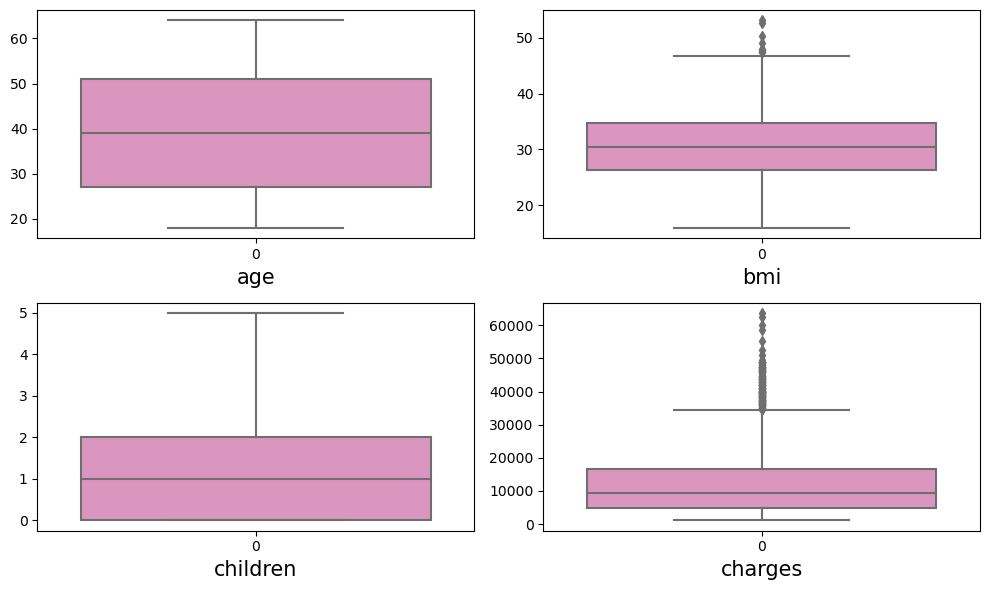

In [33]:
#Check the outliers by plotting boxplot
plt.figure(figsize=(10,6),facecolor="white")
plotnumber=1
for col in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[col],palette="Set2_r")
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

We can see that the columns bmi and charges have outliers. We don't remove outliers from the label. Therefore, we have to remove outliers only from bmi. We will do this by using IQR method as below.

In [34]:
#Calculate IQR
Q1=df['bmi'].quantile(0.25)
Q3=df['bmi'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

#Remove outliers
df1=df.loc[(df['bmi']>=lower_bound) & (df['bmi']<=upper_bound)]

In [35]:
df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<function matplotlib.pyplot.show(close=None, block=None)>

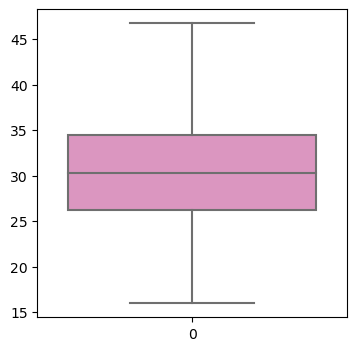

In [36]:
#Checking again for outliers in bmi column
plt.figure(figsize=(4,4))
sns.boxplot(df1['bmi'],palette="Set2_r")
plt.show

Now, we can see that the outliers have been removed from bmi column.

In [37]:
print("Data loss percentage - ",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data loss percentage -  0.672645739910314


The data loss percentage is below 10%. So it is acceptable.

Encoding Categorical Columns

In [38]:
#Encoding categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in categorical_col:
    df1[i]=OE.fit_transform(df1[i].values.reshape(-1,1))
df1

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


Checking for Skewness

In [39]:
df1.skew()

age         0.058413
sex        -0.016573
bmi         0.157180
children    0.936628
smoker      1.471424
region     -0.031651
charges     1.500577
dtype: float64

We can see that smoker column has skewness. But it is categorical data so, no need to remove skewness.

In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1329 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1329 non-null   int64  
 1   sex       1329 non-null   float64
 2   bmi       1329 non-null   float64
 3   children  1329 non-null   int64  
 4   smoker    1329 non-null   float64
 5   region    1329 non-null   float64
 6   charges   1329 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 115.4 KB


We can see that after encoding the categorical columns sex, smoker and region, their data type is converted into float.

In [42]:
#Statistical summary of numerical columns
df1.describe()

,age,sex,bmi,children,smoker,region,charges
count,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000
mean,39.203913,0.504138,30.537348,1.096313,0.203913,1.513168,13212.333374
std,14.047835,0.500171,5.919946,1.207928,0.403057,1.106532,11997.236429
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.220000,0.000000,0.000000,1.000000,4738.268200
50%,39.000000,1.000000,30.300000,1.000000,0.000000,2.000000,9361.326800
75%,51.000000,1.000000,34.485000,2.000000,0.000000,2.000000,16586.497710
max,64.000000,1.000000,46.750000,5.000000,1.000000,3.000000,62592.873090


We can see that now, after encoding the categorical columns, all the columns are showing in the summary.

There is no skewness in any of the features.

After removing outliers in bmi column, the max is not much bigger than 75%. So now it has no outliers.

Corrleation between feature to feature and feature to label

In [44]:
#Check correlation between features and label
cor=df1.corr()
cor

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019143,0.114686,0.043041,-0.024505,0.002806,0.302022
sex,-0.019143,1.000000,0.039958,0.019281,0.079854,0.002963,0.063394
bmi,0.114686,0.039958,1.000000,0.017355,-0.002871,0.155847,0.193196
children,0.043041,0.019281,0.017355,1.000000,0.007577,0.017642,0.069739
smoker,-0.024505,0.079854,-0.002871,0.007577,1.000000,-0.005181,0.785912
region,0.002806,0.002963,0.155847,0.017642,-0.005181,1.000000,-0.010730
charges,0.302022,0.063394,0.193196,0.069739,0.785912,-0.010730,1.000000


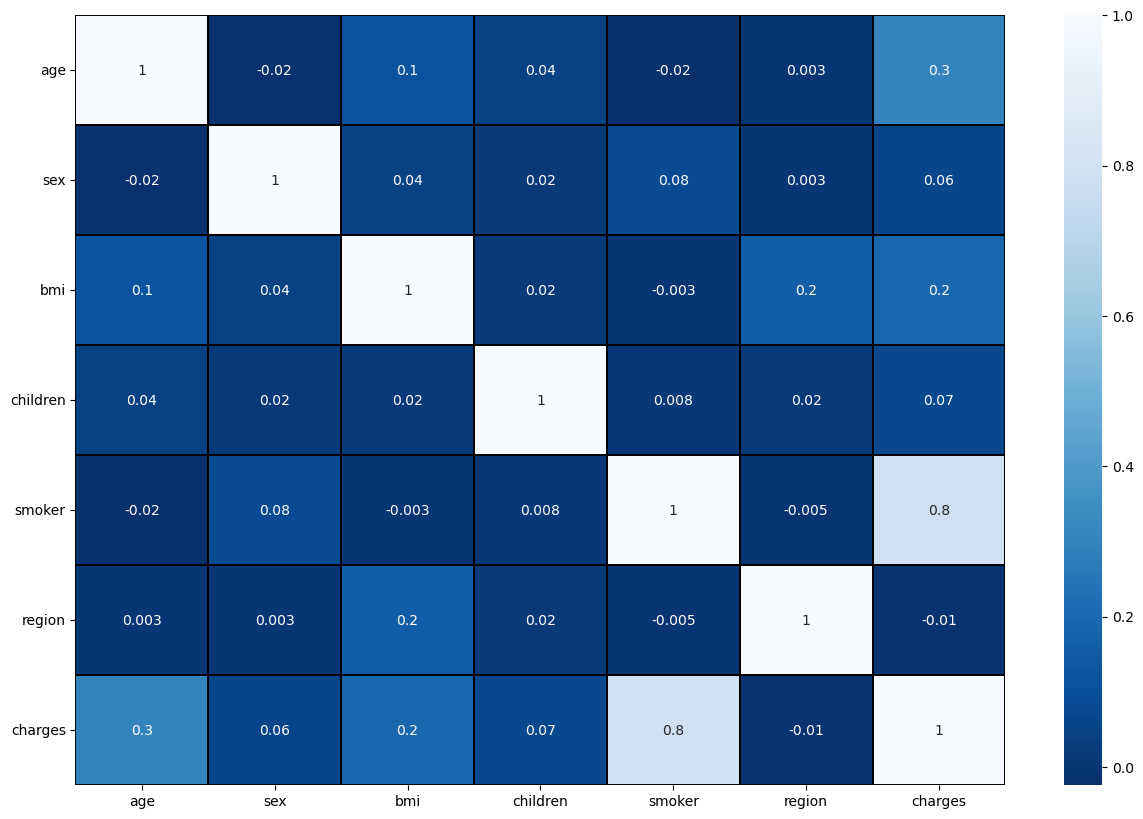

In [46]:
#Visualize the correlation between features and label
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),linewidths=0.1,fmt='.1g',linecolor='black',annot=True,cmap='Blues_r')
plt.yticks(rotation=0)
plt.show()

We can observe the following from the heatmap:

There is high positive correlation between smoker and charges

There is low positive correlation between age and charges, bmi and charges

There is no significant correlation between other features and charges.

There is no significant corrleation between the features themselves.

In [51]:
#Correlation between features and label
cor['charges'].sort_values(ascending=False)

charges     1.000000
smoker      0.785912
age         0.302022
bmi         0.193196
children    0.069739
sex         0.063394
region     -0.010730
Name: charges, dtype: float64

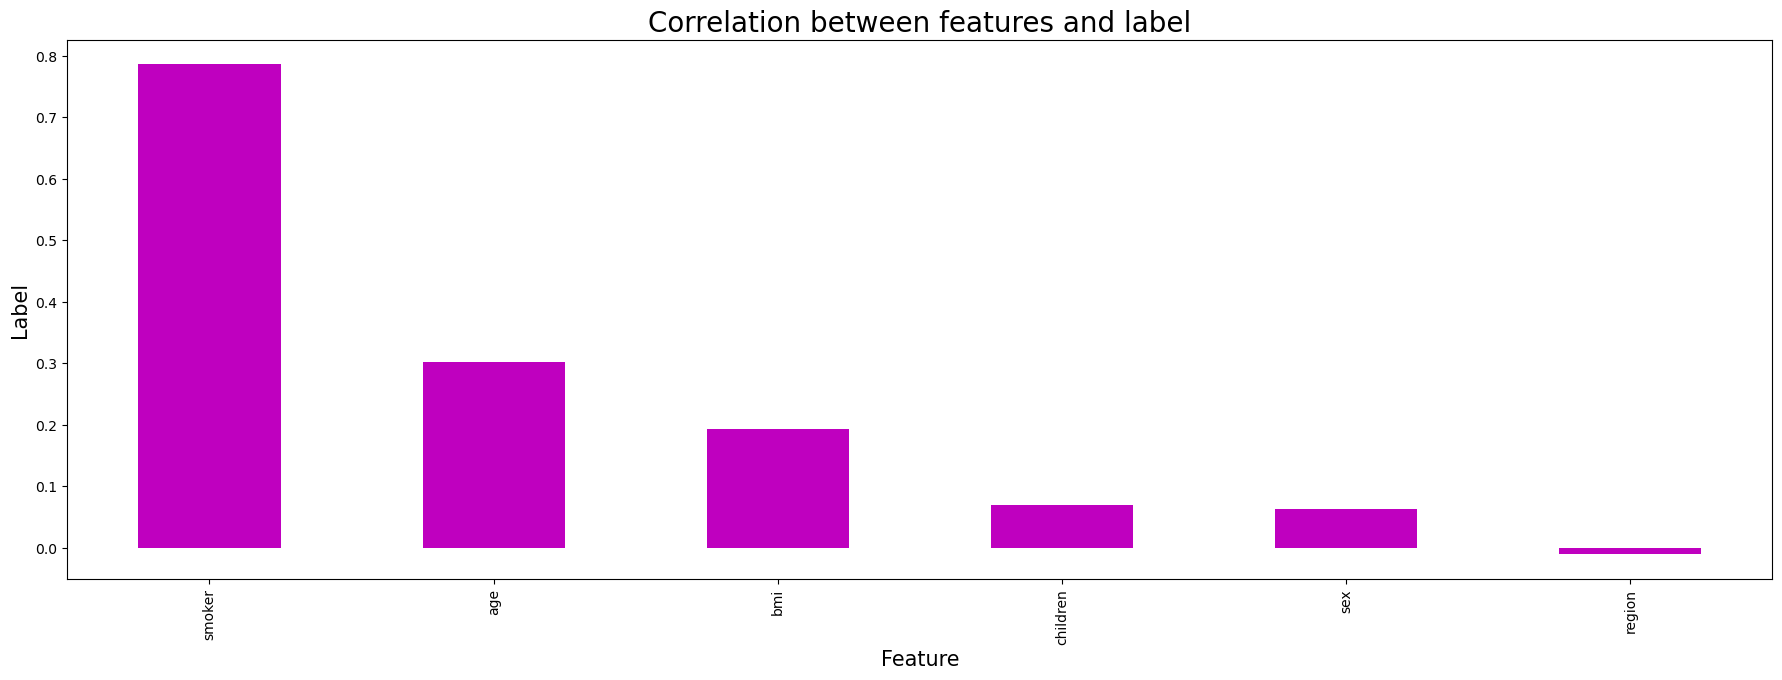

In [54]:
#Visualize the correlation between features and label
plt.figure(figsize=(22,7))
df1.corr()['charges'].sort_values(ascending=False).drop(['charges']).plot(kind='bar',color='m')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Label',fontsize=15)
plt.title('Correlation between features and label',fontsize=20)
plt.show()

We can observe that region has very less correlation with the label and smoker has the highest correlation with the label.

Separating features and label

In [55]:
x=df1.drop("charges",axis=1)
y=df1["charges"]

Feature Scaling

In [56]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.438764,-1.008311,-0.445670,-0.907940,1.975869,1.344193
1,-1.509976,0.991757,0.546267,-0.079764,-0.506106,0.440128
2,-0.797855,0.991757,0.416149,1.576587,-0.506106,0.440128
3,-0.441794,0.991757,-1.323542,-0.907940,-0.506106,-0.463937
4,-0.513006,0.991757,-0.280065,-0.907940,-0.506106,-0.463937
...,...,...,...,...,...,...
1324,0.768813,0.991757,0.073111,1.576587,-0.506106,-0.463937
1325,-1.509976,-1.008311,0.233646,-0.907940,-0.506106,-1.368002
1326,-1.509976,-1.008311,1.066737,-0.907940,-0.506106,0.440128
1327,-1.296340,-1.008311,-0.800536,-0.907940,-0.506106,1.344193


Now, we can see that all the features have been scaled to overcome the issue of biasness.

Checking Variance Inflation Factor (VIF)

In [57]:
#Find Variance Inflation Factor of each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF Values,Features
0,1.016476,age
1,1.008922,sex
2,1.040761,bmi
3,1.002702,children
4,1.007041,smoker
5,1.025432,region


We need to check the VIF values to find out if there is any multicollinerity problem with the features. Here, none of the features have a VIF value greater than 10. So, we can conclude that there is no multicollinearity problem with the features and we can proceed ahead.

# Model Building

Finding the best random state

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    GBR=GradientBoostingRegressor()
    GBR.fit(x_train,y_train)
    pred=GBR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum R2 Score is ",maxAccu,"on Random State ",maxRS)

Maximum R2 Score is  0.9187302193284302 on Random State  86


Creating train test split

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

Importing the necessary modules

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR

In [79]:
#Gradient Boosting Regressor
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print("R2_score: ",r2_score(y_test,pred_GBR))
print("R2_score on training data: ",r2_score(y_train,pred_train))
print("Mean Absolute Error: ",mean_absolute_error(y_test,pred_GBR))
print("Mean Squared Error: ",mean_squared_error(y_test,pred_GBR))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_score:  0.9186392429597399
R2_score on training data:  0.8832028327123203
Mean Absolute Error:  2155.858111784077
Mean Squared Error:  12845316.082823971
Root Mean Squared Error:  3584.036283692448


In [63]:
#Linear Regression
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print("R2_score: ",r2_score(y_test,pred_LR))
print("R2_score on training data: ",r2_score(y_train,pred_train))
print("Mean Absolute Error: ",mean_absolute_error(y_test,pred_LR))
print("Mean Squared Error: ",mean_squared_error(y_test,pred_LR))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,pred_LR)))

R2_score:  0.8122062068680821
R2_score on training data:  0.7170870558090732
Mean Absolute Error:  4037.4174338743383
Mean Squared Error:  29649068.161672454
Root Mean Squared Error:  5445.095789944604


In [64]:
#Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print("R2_score: ",r2_score(y_test,pred_RFR))
print("R2_score on training data: ",r2_score(y_train,pred_train))
print("Mean Absolute Error: ",mean_absolute_error(y_test,pred_RFR))
print("Mean Squared Error: ",mean_squared_error(y_test,pred_RFR))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_score:  0.8911588062632749
R2_score on training data:  0.9711789543074497
Mean Absolute Error:  2471.3211892450086
Mean Squared Error:  17183954.36866801
Root Mean Squared Error:  4145.353346660331


In [65]:
#XGB Regressor
XGB=XGBRegressor()
XGB.fit(x_train,y_train)
pred_XGB=XGB.predict(x_test)
pred_train=XGB.predict(x_train)
print("R2_score: ",r2_score(y_test,pred_XGB))
print("R2_score on training data: ",r2_score(y_train,pred_train))
print("Mean Absolute Error: ",mean_absolute_error(y_test,pred_XGB))
print("Mean Squared Error: ",mean_squared_error(y_test,pred_XGB))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,pred_XGB)))

R2_score:  0.8769442543865846
R2_score on training data:  0.9948136252011542
Mean Absolute Error:  2734.5358377573016
Mean Squared Error:  19428161.754071686
Root Mean Squared Error:  4407.738848215907


In [66]:
#Decision Tree Regressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred_DTR=DTR.predict(x_test)
pred_train=DTR.predict(x_train)
print("R2_score: ",r2_score(y_test,pred_DTR))
print("R2_score on training data: ",r2_score(y_train,pred_train))
print("Mean Absolute Error: ",mean_absolute_error(y_test,pred_DTR))
print("Mean Squared Error: ",mean_squared_error(y_test,pred_DTR))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,pred_DTR)))

R2_score:  0.7775267772778784
R2_score on training data:  0.9979601720667308
Mean Absolute Error:  2683.508432716792
Mean Squared Error:  35124290.503049776
Root Mean Squared Error:  5926.574938617563


In [68]:
#KNeighbors Regressor
KNN=KNeighborsRegressor()
KNN.fit(x_train,y_train)
pred_KNN=KNN.predict(x_test)
pred_train=KNN.predict(x_train)
print("R2_score: ",r2_score(y_test,pred_KNN))
print("R2_score on training data: ",r2_score(y_train,pred_train))
print("Mean Absolute Error: ",mean_absolute_error(y_test,pred_KNN))
print("Mean Squared Error: ",mean_squared_error(y_test,pred_KNN))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,pred_KNN)))

R2_score:  0.8718082478059669
R2_score on training data:  0.8474070460253833
Mean Absolute Error:  2889.512681922306
Mean Squared Error:  20239039.508058812
Root Mean Squared Error:  4498.782002726828


In [69]:
#Lasso
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print("R2_score: ",r2_score(y_test,pred_lasso))
print("R2_score on training data: ",r2_score(y_train,pred_train))
print("Mean Absolute Error: ",mean_absolute_error(y_test,pred_lasso))
print("Mean Squared Error: ",mean_squared_error(y_test,pred_lasso))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2_score:  0.8122193398405505
R2_score on training data:  0.7170870086840783
Mean Absolute Error:  4037.149238786982
Mean Squared Error:  29646994.715104345
Root Mean Squared Error:  5444.905390831354


In [70]:
#Ridge
ridge=Ridge()
ridge.fit(x_train,y_train)
pred_ridge=ridge.predict(x_test)
pred_train=ridge.predict(x_train)
print("R2_score: ",r2_score(y_test,pred_ridge))
print("R2_score on training data: ",r2_score(y_train,pred_train))
print("Mean Absolute Error: ",mean_absolute_error(y_test,pred_ridge))
print("Mean Squared Error: ",mean_squared_error(y_test,pred_ridge))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,pred_ridge)))

R2_score:  0.8121174885479467
R2_score on training data:  0.7170861317653359
Mean Absolute Error:  4039.2435715137935
Mean Squared Error:  29663075.097029656
Root Mean Squared Error:  5446.381835405011


In [77]:
#Support Vector Machine Regressor
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
print("R2_score: ",r2_score(y_test,pred_svr))
print("R2_score on training data: ",r2_score(y_train,pred_train))
print("Mean Absolute Error: ",mean_absolute_error(y_test,pred_svr))
print("Mean Squared Error: ",mean_squared_error(y_test,pred_svr))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,pred_svr)))

R2_score:  -0.09983274379494844
R2_score on training data:  -0.09593000562566023
Mean Absolute Error:  8493.096712772716
Mean Squared Error:  173642671.80177292
Root Mean Squared Error:  13177.354506947626


# Cross Validation

In [78]:
from sklearn.model_selection import cross_val_score

In [81]:
#Checking CV score for Gradient Boosting Regressor
score=cross_val_score(GBR,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ",(r2_score(y_test,pred_GBR)-score.mean())*100)

[0.87608122 0.79376877 0.88889032 0.84505412 0.86066112]
0.852891110736247
Difference between R2 score and cross validation score is -  6.574813222349285


In [89]:
#Checking CV score for Linear Regression
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ",(r2_score(y_test,pred_LR)-score.mean())*100)

[0.76260833 0.71182049 0.77313952 0.72863069 0.75664946]
0.7465696971497523
Difference between R2 score and cross validation score is -  6.563650971832979


In [90]:
#Checking CV score for Random Forest Regressor
score=cross_val_score(RFR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ",(r2_score(y_test,pred_RFR)-score.mean())*100)

[0.85301756 0.76998691 0.86324839 0.82625491 0.85291982]
0.8330855179587475
Difference between R2 score and cross validation score is -  5.80732883045274


In [91]:
#Checking CV score for XGB Regressor
score=cross_val_score(XGB,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ",(r2_score(y_test,pred_XGB)-score.mean())*100)

[0.82399284 0.74508581 0.8364069  0.7929584  0.832407  ]
0.806170190595304
Difference between R2 score and cross validation score is -  7.0774063791280595


In [92]:
#Checking CV score for Decison Tree Regressor
score=cross_val_score(DTR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ",(r2_score(y_test,pred_DTR)-score.mean())*100)

[0.75340193 0.67110323 0.71288301 0.70606212 0.66309766]
0.701309589810078
Difference between R2 score and cross validation score is -  7.621718746780049


In [93]:
#Checking CV score for KNeighbors Regressor
score=cross_val_score(KNN,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ",(r2_score(y_test,pred_KNN)-score.mean())*100)

[0.82416751 0.75474383 0.83486583 0.79767075 0.80754954]
0.8037994912119608
Difference between R2 score and cross validation score is -  6.800875659400607


In [94]:
#Checking CV score for Lasso
score=cross_val_score(lasso,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ",(r2_score(y_test,pred_lasso)-score.mean())*100)

[0.7626132  0.71184884 0.77312553 0.72863003 0.7566523 ]
0.7465739806748187
Difference between R2 score and cross validation score is -  6.564535916573178


In [95]:
#Checking CV score for Ridge
score=cross_val_score(ridge,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ",(r2_score(y_test,pred_ridge)-score.mean())*100)

[0.76260288 0.71191263 0.77304715 0.72869326 0.75660969]
0.7465731221831348
Difference between R2 score and cross validation score is -  6.5544366364811975


In [96]:
#Checking CV score for Support Vector Machine Regressor
score=cross_val_score(svr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ",(r2_score(y_test,pred_svr)-score.mean())*100)

[-0.10940544 -0.1136715  -0.06933494 -0.09724682 -0.10838195]
-0.0996081295036014
Difference between R2 score and cross validation score is -  -0.02246142913470417


Random Forest Regressor is our best performing model becausel the difference between R2 score and cross validation score for this model is the least.

# Hyper Parameter Tuning

In [97]:
from sklearn.model_selection import RandomizedSearchCV

In [98]:
param={'n_estimators': [100, 200, 300, 400, 500],
       'max_depth': [None] + list(np.arange(10, 110, 10)),
       'min_samples_split': [2, 5, 10],
       'min_samples_leaf': [1, 2, 4],
       'max_features': ['auto', 'sqrt', 'log2'],
       'bootstrap': [True, False]
      }
RCV=RandomizedSearchCV(RandomForestRegressor(),param,cv=5)
RCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})

In [99]:
RCV.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 40,
 'bootstrap': False}

# Building the Final Model

In [100]:
final_model=RandomForestRegressor(n_estimators=200,min_samples_split=5,min_samples_leaf=4,max_features='log2',max_depth=40,bootstrap=False)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
print("R2_score: ",r2_score(y_test,pred))
print("Mean Absolute Error: ",mean_absolute_error(y_test,pred))
print("Mean Squared Error: ",mean_squared_error(y_test,pred))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,pred)))

R2_score:  0.9070325308260013
Mean Absolute Error:  2427.034572313614
Mean Squared Error:  14677795.17303751
Root Mean Squared Error:  3831.161073752644


In [102]:
#Save the model
import pickle
filename='Medical_Cost_Personal_Insurance.pkl'
pickle.dump(final_model,open(filename,'wb'))

In [103]:
#Load the saved model and compute the score
loaded_model=pickle.load(open('Medical_Cost_Personal_Insurance.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

90.70325308260013


In [104]:
#Prediction using the loaded model
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,389,390,391,392,393,394,395,396,397,398
Predicted,6823.131643,42708.711813,21216.292805,39881.945886,8101.933311,21710.525236,16132.070623,7325.298701,4398.667813,14588.885137,...,19739.60655,13688.54518,13754.556605,42729.037608,5458.099825,4443.829851,5257.405179,25897.348927,40241.979267,16079.342525
Original,4005.422500,46889.261200,19023.260000,40419.019100,6079.671500,20773.627750,12646.207000,18157.876000,7323.734819,10560.491700,...,17178.68240,13462.52000,12233.828000,44400.406400,4931.647000,3260.199000,5488.262000,27037.914100,43896.376300,11987.168200
